In [58]:
import pandas as pd
import numpy as np
df_train= pd.read_csv('https://raw.githubusercontent.com/rafathrb/test/main/wineQualityRed_train.csv')
df_test= pd.read_csv('https://raw.githubusercontent.com/rafathrb/test/main/wineQualityRed_test.csv')
df_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,10.6,0.28,0.39,15.5,0.069,6,23,1.0026,3.12,0.66,9.2,5
1,9.4,0.30,0.56,2.8,0.080,6,17,0.9964,3.15,0.92,11.7,8
2,10.6,0.36,0.59,2.2,0.152,6,18,0.9986,3.04,1.05,9.4,5
3,10.6,0.36,0.60,2.2,0.152,7,18,0.9986,3.04,1.06,9.4,5
4,10.6,0.44,0.68,4.1,0.114,6,24,0.9970,3.06,0.66,13.4,6


In [59]:
#preparing train and test for linear regression
y_train= df_train["quality"]
x_train= df_train.drop(['quality'],axis=1)
y_test= df_test["quality"]
x_test= df_test.drop(['quality'],axis=1)

# Linear Regression

In [66]:
# performing linear regression
from sklearn.linear_model import LinearRegression
reg= LinearRegression()
reg.fit(x_train,y_train)
y_pred=reg.predict(x_test)

In [67]:
# Accuracy of model, intercept and respective coefficients
print('Accuracy of model is up to:',reg.score(x_test,y_test)*100,'%')
print('intercept:',reg.intercept_)
pd.DataFrame({'coefficients':reg.coef_,'features':x_test.columns})

Accuracy of model is up to: 24.572583176357522 %
intercept: 31.70008609312341


,coefficients,features
0,-0.005777,fixed acidity
1,-1.071241,volatile acidity
2,-0.062808,citric acid
3,0.010204,residual sugar
4,-1.940819,chlorides
5,0.003541,free sulfur dioxide
6,-0.002162,total sulfur dioxide
7,-26.848124,density
8,-0.634629,pH
9,1.241801,sulphates


In [68]:
# MSE of test dataset
from sklearn import metrics
print('Mean Squared Error (MSE):',metrics.mean_squared_error(y_test,y_pred))

Mean Squared Error (MSE): 0.4462756091138073


C:\Users\mssre\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


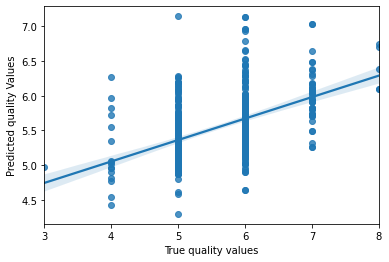

In [69]:
# true values Vs. Predicted values with the fitting line
import seaborn as sns
import matplotlib.pyplot as plt
sns.regplot(y_test,y_pred)
plt.xlabel('True quality values')
plt.ylabel('Predicted quality Values')
plt.show()